# Morgan's Exploratory File

## Read Data Files

First, I imported the pandas library in preparation of exploring each csv/tsv file available

In [1]:
import pandas as pd

### Movie Gross

In [2]:
movie_gross = pd.read_csv("../data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The movie_gross dataframe contains title, studios, domestic gross revenue, foreign gross revenue, and the year of release.

### Movie Info

In [3]:
movie_info = pd.read_csv("data/rt.movie_info.tsv", sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This dataframe contains information on genres and directors, which I think may potentially be useful predictors of profit. However, it lacks movie titles, which will make it difficult to merge/join with other datasets to gain more useful insight. 

### Reviews

In [4]:
reviews = pd.read_csv("data/rt.reviews.tsv", encoding='latin-1', sep='\t')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


This dataframe contains reviews and ratings, which could be useful if there were also movie titles or some other indicator of which movie is being referenced other than the ID number. 

###  TMDB

In [5]:
tmdb = pd.read_csv("data/tmdb.movies.csv", index_col = 0)
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This dataset also has genres listed as ID numbers (much like the Movie Info dataframe). As an added benefit, Landon was able to help me locate a data dictionary for me to replace these integers with their associated genre. However, this dataframe has the advantage of having the title and popularity ranking included in the rows, which the Movie Info dataframe lacked. 

### Movie Budgets

In [6]:
budgets = pd.read_csv("data/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Finally, the budgets dataframe contains information on the production budget and worldwide gross revenue. This dataframe is useful for calculating total profit. 

### Initial Curiosities

Based off my first glance at these datasets, I decided to first explore if there is any correlation between genre and profit. Because they share information about movie titles, I decide to utilize both the budgets dataframe as well as the TMDB dataframe.

## 2 Sample T-Test

### Initial Data Cleaning

#### Casting gross revenue and production cost as integers

I decided that the first order of business would be to calculate my measurement of benefit (in this scenario, profit). To do so, I needed to subtract production cost from worldwide revenue. However, these columns weren't ready for me to perform calculations on yet because they were not the correct data type.

I could tell from my initial glance at the budgets dataframe that there were string characters (such as $) in the cells. To confirm which characters I needed to remove before casting this column as an integer, I took a brief look at the first few values. 

In [7]:
budgets['worldwide_gross'].head() # finding strings to remove

0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object

Thus, it is clear that I need to remove $ and , from the values before casting them as integers. 

In [8]:
# removing $ and , from gross revenue
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(",","")
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","")

# casting the values as integers
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])

I could also tell that the production_budget column shares these same characters. So, I performed the same operations on this column as well. 

In [9]:
# removing $ and , from production budget
budgets['production_budget'] = budgets['production_budget'].str.replace(",","")
budgets['production_budget'] = budgets['production_budget'].str.replace("$","")

# casting the values as integers
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])

#### Adding and Populating Profit Column

Now that these values were cast as integers, I could create a new column in the dataframe to represent total profit.
Note: I used worldwide gross rather than domestic gross as it appeared to be a more holistic representation of the overall revenue than domestic gross. Because I did not use the domestic gross column in my calculation, I did not dedicate time to cleaning this column. 

In [10]:
# calculating total profit
budgets['total_profit'] =  budgets['worldwide_gross'] - budgets['production_budget']

# confirmation
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


#### Checking for Nulls and Duplicates

In [11]:
# any nulls?
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   int64 
 6   total_profit       5782 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 316.3+ KB


There doesn't appear to be any nulls or null-like values

In [12]:
# any duplicates?
budgets.duplicated().value_counts()

False    5782
dtype: int64

There don't appear to be any duplicates either

#### Merging the Budgets and TMDB Dataframes

With the profit column created, I began to tackle how I might combine this dataframe with the TMDB dataframe so that I could merge the available information on genres with the available information on profit for the associated movie. 

To do so, I first ensured that the movie titles were the indeces for each of these dataframes. 

In [13]:
budgets.set_index('movie')
tmdb.set_index('title')

,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
title,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
Toy Story,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,7.9,10174
Inception,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...,...,...
Laboratory Conditions,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,0.0,1
_EXHIBIT_84xxx_,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1
The Last One,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,0.0,1


Once these indeces were set, I joined these dataframes using an inner join. I used an inner join because I currently have no use for movies that appear in one dataframe and not the other. However, I made sure to save this joined dataframe as a separate dataframe, thus preserving the initial dataframes in case I need to refer back to them later. I also set suffixes in case of repeated column names. After merging, I used the .info() method to confirm that I have populated the table adequately.

In [14]:
budgets_and_tmdb = budgets.join(tmdb, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')
budgets_and_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_budgets            5782 non-null   int64  
 1   release_date_budgets  5782 non-null   object 
 2   movie                 5782 non-null   object 
 3   production_budget     5782 non-null   int64  
 4   domestic_gross        5782 non-null   object 
 5   worldwide_gross       5782 non-null   int64  
 6   total_profit          5782 non-null   int64  
 7   genre_ids             5782 non-null   object 
 8   id_tmdb               5782 non-null   int64  
 9   original_language     5782 non-null   object 
 10  original_title        5782 non-null   object 
 11  popularity            5782 non-null   float64
 12  release_date_tmdb     5782 non-null   object 
 13  title                 5782 non-null   object 
 14  vote_average          5782 non-null   float64
 15  vote_count           

I noticed afterwards that the number of valid rows in each column matched perfectly with the total number of rows in the smaller dataframe (budget). This implied to me that I was able to gather genre information about every movie for which I had profit information. 

#### Replacing Genre Ids with Dummy Columns for the Appropriate Genre

I also noticed from this output that my genre_ids column, which I had previously thought contained lists of integers based on what was observed in the first few rows of this dataframe, is actually just strings. In order to create a frequency distribution of the genres, I needed to accomplish the following:

1. Remove brackets and whitespace
2. Replace each genre id with the associated genre
3. Create a new dataframe with genres as columns and cells containing binary values
    0 -> the movie represented in this row is NOT this genre
    1 -> the movie represented in this row IS this genre
    
For this section, I got some help from Landon, who utilized this resource to help solve a similar problem: https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

In [16]:
def create_dummy_cols(column):

    # remove [, ], and whitespace
    column = column.str.strip("]")
    column = column.str.strip("[")
    column = column.str.replace(" ", "")


    # split by comma
    genres = column.str.split(",")

    bin_genre_df = pd.get_dummies(genres.apply(pd.Series).stack()).sum(level=0)
    budgets_and_genre_dummys = budgets_and_tmdb.join(bin_genre_df, how='inner', lsuffix = '_budgets' , rsuffix = '_dummys')

    # drop irrelevant cols
    cols_to_remove = ["original_language","","vote_average","vote_count","original_title","popularity","id_budgets","release_date_budgets","id_tmdb","release_date_tmdb","production_budget","domestic_gross","worldwide_gross","movie"]
    cols_to_keep = [col for col in budgets_and_genre_dummys.columns if col not in cols_to_remove]
    budgets_and_genre_dummys = budgets_and_genre_dummys[cols_to_keep]
    budgets_and_genre_dummys.head()

    # rename columns for genres
    budgets_and_genre_dummys.rename(columns = {'28' : 'Action', 
                                           '12' : 'Adventure',
                                          '16' : 'Animation',
                                          '35' : 'Comedy',
                                          '80' : 'Crime',
                                          '99' : 'Documentary',
                                          '18' : 'Drama',
                                          '10751' : 'Family',
                                          '14' : 'Fantasy',
                                          '36' : 'History',
                                          '27' : 'Horror',
                                          '10402' : 'Music',
                                          '9648' : 'Mystery',
                                          '10749' : 'Romance',
                                          '878' : 'SciFi',
                                          '10770' : 'TV',
                                          '53' : 'Thriller',
                                          '10752' : 'War',
                                          '37' : 'Western'}, inplace = True)

    return budgets_and_genre_dummys

budgets_and_genre_dummys = create_dummy_cols(budgets_and_tmdb['genre_ids'])
budgets_and_genre_dummys.head()

,total_profit,genre_ids,title,Music,Romance,Family,War,TV,Adventure,Fantasy,...,Horror,Action,Comedy,History,Western,Thriller,Crime,SciFi,Mystery,Documentary
0,2351345279,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,635063875,"[14, 12, 16, 10751]",How to Train Your Dragon,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-200237650,"[12, 28, 878]",Iron Man 2,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1072413963,"[16, 35, 10751]",Toy Story,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,999721747,"[28, 878, 12]",Inception,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


### Visualization

#### Visualizing Distribution of Genres

Next, I needed to find the sum by genre column in order to visualize the distribution of genres.

In [17]:
# Creating dictionary for all genres and frequencies

def freq_dictionary(dataframe):
    genre_sums = {}
    for col in dataframe.columns:
    
        ignored_cols = ["title", "genre_ids","total_profit"]
    
        if col not in ignored_cols:
            genre_sums[col] = dataframe[col].value_counts()[1]
        
    return genre_sums

genre_sums = freq_dictionary(budgets_and_genre_dummys)
genre_sums

{'Music': 312,
 'Romance': 611,
 'Family': 422,
 'War': 72,
 'TV': 155,
 'Adventure': 323,
 'Fantasy': 264,
 'Animation': 336,
 'Drama': 1903,
 'Horror': 723,
 'Action': 706,
 'Comedy': 1394,
 'History': 127,
 'Western': 44,
 'Thriller': 944,
 'Crime': 353,
 'SciFi': 358,
 'Mystery': 274,
 'Documentary': 958}

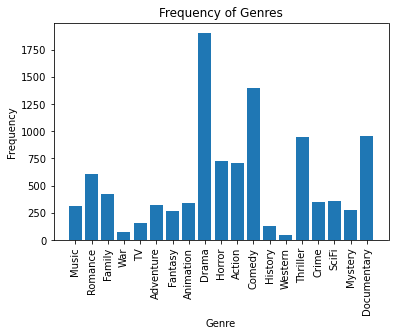

In [18]:
# plotting the frequency of genres

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.bar(x = list(genre_sums.keys()), height = list(genre_sums.values()))
plt.xticks(rotation = 90)
ax.set_title("Frequency of Genres")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency");

It is clear that the most common genre is Drama. Thus, my question is: Is the most popular genre (Drama) significantly more profitable than all other genres?

My plan of action is:
1. Visualize the distributions of profits for all movies other than dramas vs. dramas
2. Calculate the average profit for all movies of all genres other than drama
3. Calculate the average profit for all dramas 
4. Perform a two-sample t-test to see if the average profit for dramas is significantly larger than the average profit for all other genres. 

First, I needed to make sure all of the relevant information for the analysis was in one place. I had the dummy columns and I had the profit information, but they were in different dataframes. I needed to pull them together. 

In order to visualize the histogram of profit for all movies for which the Drama column = 1, I need to first isolate these movies

In [19]:
dramas = budgets_and_genre_dummys.loc[budgets_and_genre_dummys['Drama'] == 1 ]
dramas.head()

,total_profit,genre_ids,title,Music,Romance,Family,War,TV,Adventure,Fantasy,...,Horror,Action,Comedy,History,Western,Thriller,Crime,SciFi,Mystery,Documentary
15,636860230,"[12, 14, 18, 10749]",The Twilight Saga: Eclipse,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
18,767003568,"[28, 18, 53]",The Bourne Supremacy,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
19,685213767,"[18, 53, 9648]",Shutter Island,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
20,710366855,"[28, 18, 9648, 53]",The Bourne Identity,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
23,142085065,"[18, 10749]",Step Up 3D,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Visualizing Distribution of Profits for Dramas

After isolating the dramas from the rest of the movies, I could visualize the distribution of profits amongst dramas. 

Lowest profit: $-94635231


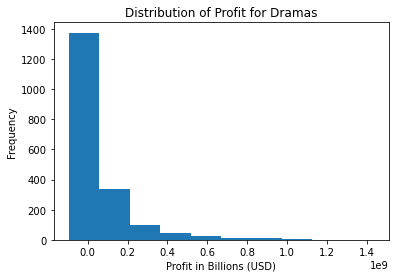

In [20]:
fig, ax = plt.subplots()
ax.hist(dramas['total_profit'])
ax.set_title("Distribution of Profit for Dramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = dramas['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}") # There are movies that did not generate profit!

The data appears greatly skewed and may benefit from a log transformation.

C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


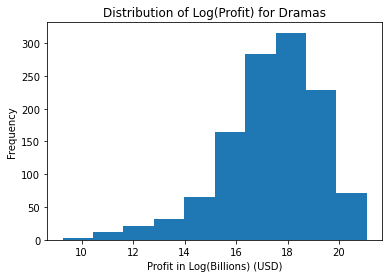

In [21]:
# apply transformation
import numpy as np
log_drama_profit = np.log(dramas['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_drama_profit)
ax.set_title("Distribution of Log(Profit) for Dramas")
ax.set_xlabel("Profit in Log(Billions) (USD)")
ax.set_ylabel("Frequency");

This looks much more "normal", but there is still an evident negative skew. There's two options to proceed:
1. Investigate whether this skew is circumvented by removing movies in which no profit was made (either by removing the rows or replacing them with 0 profit).
2. Attempt a different transformation.
3. Proceed with the caveat that the results may not be as accurate by nature of there being a negative skew in the data. 

##### OPTION 1: Isolate Movies that Generated Profit

I recreated the above histogram, but added a filter such that only profitable movies were included

Lowest profit: $10536


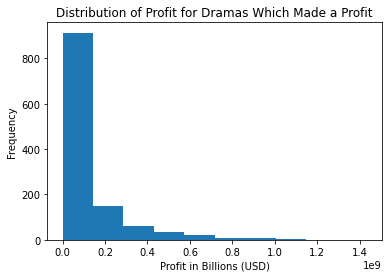

In [22]:
fig, ax = plt.subplots()

dramas_pos_profits = dramas.loc[ dramas['total_profit'] >= 0]


ax.hist(dramas_pos_profits['total_profit'])
ax.set_title("Distribution of Profit for Dramas Which Made a Profit")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = dramas_pos_profits['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}")

The difference in shape was minimal, but I still looked at whether this had an impact on the distribution post-log transformation

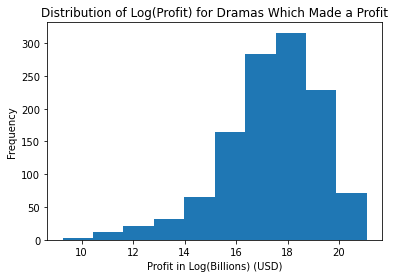

In [23]:
# apply transformation
log_drama_pos_profit = np.log(dramas_pos_profits['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_drama_pos_profit)
ax.set_title("Distribution of Log(Profit) for Dramas Which Made a Profit")
ax.set_xlabel("Profit in Log(Billions) (USD)")
ax.set_ylabel("Frequency");

Unfortunately, this didn't appear to make a significant impact on the negative skew. However, because all of the values were now positive, I attempted a BoxCox transformation. 

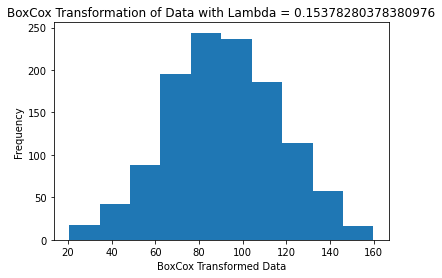

In [24]:
# Resource: https://www.geeksforgeeks.org/box-cox-transformation-using-python/
import scipy.stats as stats

# Box-Cox Transformation in Python
fitted_data, fitted_lambda = stats.boxcox(dramas_pos_profits['total_profit'])

fig, ax = plt.subplots()
ax.hist(fitted_data)
ax.set_title("BoxCox Transformation of Data with Lambda = " + str(fitted_lambda))
ax.set_xlabel("BoxCox Transformed Data")
ax.set_ylabel("Frequency");

This looked SIGNIFICANTLY better. However, I wanted to make sure I wasn't losing a significant portion of observations. So, I checked the shape of the dataframe before and after filtering for positive profit. 

In [25]:
dramas.shape

(1903, 22)

In [26]:
dramas_pos_profits.shape

(1198, 22)

In [27]:
1200 / 1905

0.6299212598425197

We retained about 63% of the dataset. I.e, we lost about 37% of the observations because they were unprofitable. 

This is, admittedly, a pretty significant portion of the dataset. So, I decided to explore shifting the dataset before applying the BoxCox method to see if I could avoid the error that would occur when passing negative profits into the BoxCox function.

##### OPTION 2: Attempt a Different Transformation (Box-Cox with Additional Shift)

First, I needed to calculate the minimum shift to maintian the shape of the distribution while ensuring that all values were positive. To do so, I added the absolute value of the minimum profit plus 1 to every value.

In [28]:
# Resources on shifts:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#:~:text=y%20%3D%20%28x%2A%2Almbda%20-%201%29%20%2F%20lmbda%2C%20for,shift%20parameter%20to%20achieve%20this%3B%20boxcox%20does%20not.
# https://nickcdryan.com/2017/04/19/the-box-cox-transformation/

original_min_positive = (dramas['total_profit'].min())*-1
shift = original_min_positive + 1

dramas['total_profit_shifted'] = dramas['total_profit'].map(lambda x: x+shift)
dramas_shifted_min = dramas['total_profit_shifted'].min()
print(dramas_shifted_min) # ensuring that the smallest value is positive and not zero. 

1


<ipython-input-28-3338a465328b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dramas['total_profit_shifted'] = dramas['total_profit'].map(lambda x: x+shift)


Then, I plotted the distribution to ensure the general shape appeared to be maintained.

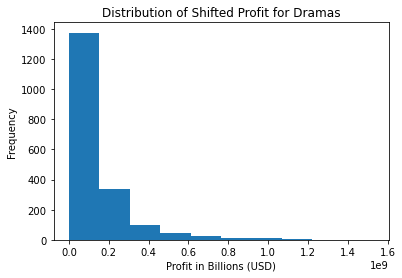

In [29]:
fig, ax = plt.subplots()
ax.hist(dramas['total_profit_shifted'])
ax.set_title("Distribution of Shifted Profit for Dramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

It appears as though the original shape of the dataset was maintained while still ensuring that all values are positive. 

Now, to apply the Box-Cox transformation again. 

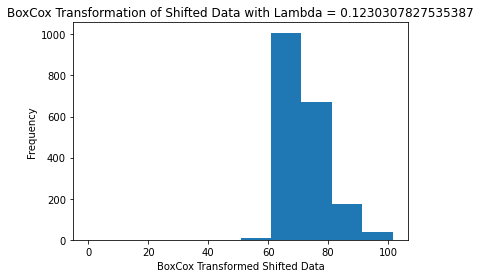

In [30]:
# Box-Cox Transformation in Python 
fitted_data, fitted_lambda = stats.boxcox(dramas['total_profit_shifted'])

fig, ax = plt.subplots()
ax.hist(fitted_data)
ax.set_title("BoxCox Transformation of Shifted Data with Lambda = " + str(fitted_lambda))
ax.set_xlabel("BoxCox Transformed Shifted Data")
ax.set_ylabel("Frequency");

This transformation didn't appear to be working, and the number of shifts and transformations appeared to be increasing, further complicating the results and the interpretation. So, I decided to fall back on the log transformation and made a note to mention that there may be some inaccuracy in the results as a consequence of the negative skew in the log-transformed data. 

#### Visualizing Distribution of Profits for Non-Dramas

Since the log-transformed data was relatively normally distributed, I decided to look at the rest of the movies and see what their distribution appeared to be.

First, I isolated the non-dramas.

In [31]:
nondramas = budgets_and_genre_dummys.loc[ budgets_and_genre_dummys['Drama'] == 0 ]
nondramas.head()

,total_profit,genre_ids,title,Music,Romance,Family,War,TV,Adventure,Fantasy,...,Horror,Action,Comedy,History,Western,Thriller,Crime,SciFi,Mystery,Documentary
0,2351345279,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,635063875,"[14, 12, 16, 10751]",How to Train Your Dragon,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-200237650,"[12, 28, 878]",Iron Man 2,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1072413963,"[16, 35, 10751]",Toy Story,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,999721747,"[28, 878, 12]",Inception,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


Then, I plotted the distribution of their profits to get an idea of the distribution shape. 

Lowest profit: $-200237650


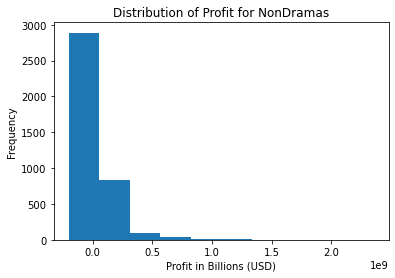

In [32]:
fig, ax = plt.subplots()
ax.hist(nondramas['total_profit'])
ax.set_title("Distribution of Profit for NonDramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = nondramas['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}")

This looked very similar to the distribution for dramas, so I applied the same log transformation. 

C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


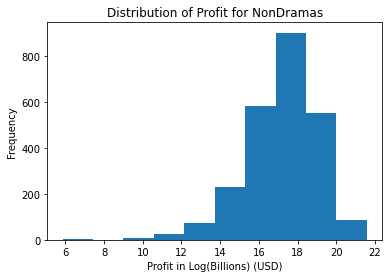

In [33]:
# apply log transformation
log_nondrama_profit = np.log(nondramas['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_nondrama_profit)
ax.set_title("Distribution of Profit for NonDramas")
ax.set_xlabel("Profit in Log(Billions) (USD)")
ax.set_ylabel("Frequency");

Again, the transformation succeeded in making the distribution more normal, but there was still a clear negative skew. 

From here, I plotted the distribution of profits for dramas against the distribution of profits for nondramas to see where they differ.

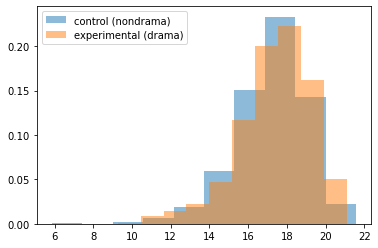

In [34]:
# Plot both distributions on the same figure
plt.hist(log_nondrama_profit, alpha=0.5, label='control (nondrama)', density = True)
plt.hist(log_drama_profit, alpha=0.5, label='experimental (drama)', density = True)
plt.legend()
plt.show()

There didn't appear to be a significant difference in the general shape of the distributions, but I tested the means anyways to make sure, as there could be a very slight difference. 

In [35]:
# Calculate p-value with stats.ttest_ind

print(f"Mu_0: {log_nondrama_profit.mean()}")
print(f"Mu_1: {log_drama_profit.mean()}")

tstat, pval = stats.ttest_ind(log_drama_profit, log_nondrama_profit, nan_policy = 'omit')
print(f"P-Value: {pval}")
print(f"T-Statistic: {tstat}")
# this doesn't seem right 

Mu_0: 17.195775816274278
Mu_1: 17.370504924541702
P-Value: 0.0073030952057422755
T-Statistic: 2.6842034888980617


While I anticipated that the p-value would likely exceed 0.05 (or if not, it would be very close) this p-value is shockingly small and indicates that there is a major difference in the means of these two datasets (which is clearly not the case, as the means are nearly identical). 

I decided to investigate whether this had something to do with the log transformation introducing complications that invalidate these results. So, I performed the same t-test on the original, untransformed data. 

In [36]:
print(f"Mu_0: {round(nondramas['total_profit'].mean(),2)}")
print(f"Mu_1: {round(dramas['total_profit'].mean(),2)}")

tstat, pval = stats.ttest_ind(dramas['total_profit'], nondramas['total_profit'], nan_policy = 'omit')
print(f"P-Value: {pval}")
print(f"T-Statistic: {tstat}")
# this doesn't seem right either

Mu_0: 56247146.59
Mu_1: 67366967.4
P-Value: 0.006537482302575186
T-Statistic: 2.720517956169709


I found that these results were similarly significant despite several signs that the difference should be minimal. 

While the p-value does suggest that there is a significant difference between these distributions (as well as the two original distributions), it simply does not seem plausible given their means and general shape. So, I decided to forego the two sample t-test in favor of a different statistical test.

### Chi-Squared Test

#### Visualizing Distribution

My next idea was to perform a chi-square test on all genres to determine if any are associated with significant gains in profit. 

In order to begin this process, I needed to create a contingency table with rows denoting genres and columns denoting "levels" of profitability. In order to create the latter, I would need to somehow standardize the thresholds for these levels. 

Since I decided to work with all genres rather than two (drama v. nondrama) I decided to look at the full distribution of profit and get an idea of it's overall shape. 

In [37]:
average_movie_profit = budgets['total_profit'].mean()
print("The average movie profit is {:,.2f}".format(average_movie_profit))

std_movie_profit = np.std(budgets['total_profit'])
print("The standard deviation is {:,.2f}".format(std_movie_profit))

The average movie profit is 59,899,703.81
The standard deviation is 146,076,247.46


The standard deviation was greater than the average. So I decided to look at the distribution of profits overall. 

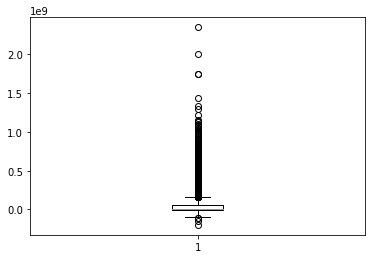

In [38]:
fig, ax = plt.subplots()
ax.boxplot(budgets['total_profit']);

#### Removing Outliers via IQR

I noticed that there was a really wide range because of some extremely profitable (and unprofitable) movies. I decided it would be worthwhile to remove the outliers. Since this is not a normally distributed dataset, I decided to use the IQR as a means of removing outliers rather than the standard deviation. 

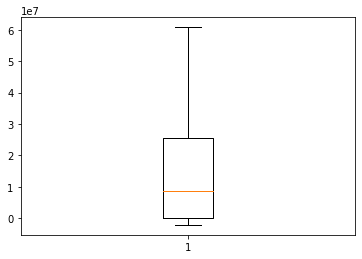

In [39]:
# resource: https://www.statology.org/remove-outliers-python/

#find Q1, Q3, and interquartile range for each column
Q1 = budgets['total_profit'].quantile(q=.25)
Q3 = budgets['total_profit'].quantile(q=.75)
IQR = budgets['total_profit'].apply(stats.iqr)

budgets_iqr = budgets.loc[~((budgets['total_profit'] < (Q1-1.5*IQR)) | (budgets['total_profit'] > (Q3+1.5*IQR)))]

fig, ax = plt.subplots()
ax.boxplot(budgets_iqr['total_profit']);


##### A Slight Detour (Back to T-Test)
After isolating the IQR, I wondered: Do the distributions of dramas and nondramas look better without these outliers? So, I followed the same steps as I did during the initial attempt at a T-Test to see if removing these outliers improved the normality of the distribution of profits. 

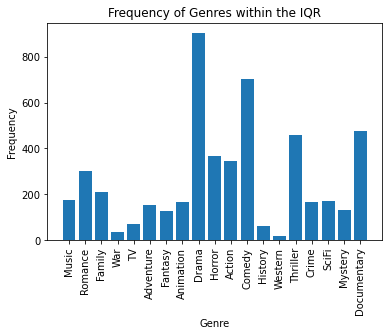

In [40]:
budgets_iqr.set_index('movie')
budgets_iqr_and_tmdb = budgets_iqr.join(tmdb, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')

iqr_budgets_and_genre_dummys = create_dummy_cols(budgets_iqr_and_tmdb['genre_ids'])
iqr_budgets_and_genre_dummys.head()

iqr_genre_sums = freq_dictionary(iqr_budgets_and_genre_dummys)

fig, ax = plt.subplots()
ax.bar(x = list(iqr_genre_sums.keys()), height = list(iqr_genre_sums.values()))
plt.xticks(rotation = 90)
ax.set_title("Frequency of Genres within the IQR")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency");

In [41]:
dramas_iqr = iqr_budgets_and_genre_dummys.loc[ iqr_budgets_and_genre_dummys['Drama'] == 1 ]
dramas_iqr.head()

,total_profit,genre_ids,title,Music,Romance,Family,War,TV,Adventure,Fantasy,...,Horror,Action,Comedy,History,Western,Thriller,Crime,SciFi,Mystery,Documentary
88,47784,"[18, 53]",Fair Game,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
90,2982519,"[10752, 28, 12, 18, 53]",Green Zone,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
122,36627518,"[18, 28, 36]",Ip Man,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
133,13038324,"[14, 18, 10751]",16 Wishes,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
143,57986320,"[18, 27, 9648, 53]",My Soul to Take,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Lowest profit: $-2000000


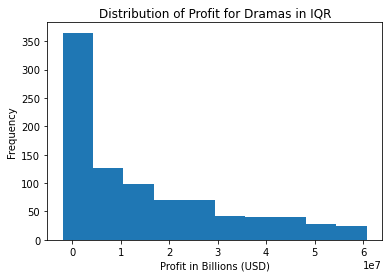

In [42]:
fig, ax = plt.subplots()
ax.hist(dramas_iqr['total_profit'])
ax.set_title("Distribution of Profit for Dramas in IQR")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = dramas_iqr['total_profit'].min()
print(f"Lowest profit: ${lowest_profit}")

Lowest Log(profit): $9.262553243423117


C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morpelletier\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


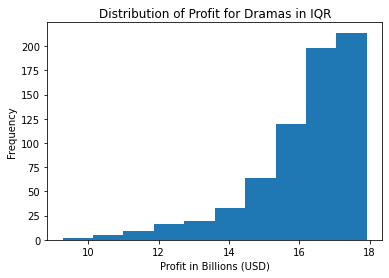

In [43]:
# apply transformation
import numpy as np
log_drama_iqr_profit = np.log(dramas_iqr['total_profit'])

# plot
fig, ax = plt.subplots()
ax.hist(log_drama_iqr_profit)
ax.set_title("Distribution of Profit for Dramas in IQR")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

lowest_profit = log_drama_iqr_profit.min()

print(f"Lowest Log(profit): ${lowest_profit}")

It actually appeared to make the skew worse. So, I returned to the Chi-Square analysis by defining high vs. medium vs. low profitability.

#### Prep for Chi-Squared Test

First, I looked at the overall distribution.

In [44]:
iqr_budgets_and_genre_dummys['total_profit'].describe()

count    2.890000e+03
mean     1.496507e+07
std      1.712078e+07
min     -2.178990e+06
25%      1.307508e+05
50%      8.550286e+06
75%      2.537178e+07
max      6.083874e+07
Name: total_profit, dtype: float64

Then, I researched the Chi-Square test and how to apply it in Python. (I have previous experience conducting the test in SPSS, but not Python)

The resource used: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

Now that I had done some research and felt confident about using a chi-square test for this dataset, I created a plan for action.
1. Assign high/medium/low profitability based on 75th percentile and above / 25th - 75th percentile / and 25th percentile and lower
    - Create a new column for relative profit and use newly defined threshold variables to filter each movie into these categories (can't use the old ones because we used it to filter out outliers)
2. Create a contingency table with genres on the rows and relative profit on the columns. 
    - use iterrows to itterrate through each row and their genre. For each genre present in the genre column, add one count to the appropriate profit column. For example, if a movie is a drama and generated high profit, add 1 to the cell appropriate for that genre and profit category. If a movie is a drama and an animation and generated high profit, add 1 to the cell appropriate for dramas with high profit and 1 to the cell appropriate for animations with high profit. 
3. use the appropriate scipy stats function to calculate the p-value
    - chi2_contingency
   
##### Turning Profit into a Categorical Variable

In [45]:
# define thresholds
iqr_Q1 = iqr_budgets_and_genre_dummys['total_profit'].quantile(q=.25)
iqr_Q3 = iqr_budgets_and_genre_dummys['total_profit'].quantile(q=.75)

In [46]:
# assign categories based on thresholds
iqr_budgets_and_genre_dummys.loc[ iqr_budgets_and_genre_dummys['total_profit'] >= iqr_Q3, 'relative_profit_cat'] = 'high'
iqr_budgets_and_genre_dummys.loc[ iqr_budgets_and_genre_dummys['total_profit'] <= iqr_Q1, 'relative_profit_cat'] = 'low'
iqr_budgets_and_genre_dummys.loc[ iqr_budgets_and_genre_dummys['relative_profit_cat'].isna() , 'relative_profit_cat'] = 'medium'

iqr_budgets_and_genre_dummys.head()

,total_profit,genre_ids,title,Music,Romance,Family,War,TV,Adventure,Fantasy,...,Action,Comedy,History,Western,Thriller,Crime,SciFi,Mystery,Documentary,relative_profit_cat
13,7778100,"[16, 10751]",Tangled,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,medium
61,19535492,"[28, 80]",Kick-Ass,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,medium
65,2687603,"[28, 80, 53]",From Paris with Love,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,medium
88,47784,"[18, 53]",Fair Game,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,low
89,35098356,"[35, 10402, 10770]",Camp Rock 2: The Final Jam,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,high


##### Contingency Table

First, I created a blank contingency table for me to populate with values by iterating through the dataset

In [47]:
genres = []

for column in iqr_budgets_and_genre_dummys.columns:
    ignored_cols = ['total_profit','title','relative_profit_cat','genre_ids']  
    if column not in ignored_cols:
        genres.append(column)
        
contingency_table = pd.DataFrame(columns = ['high', 'medium', 'low'], index = genres)
contingency_table.reset_index(inplace = True)
contingency_table.head()
contingency_table = contingency_table.fillna(0)
contingency_table.head()

,index,high,medium,low
0,Music,0,0,0
1,Romance,0,0,0
2,Family,0,0,0
3,War,0,0,0
4,TV,0,0,0


Then, I iterated through each row in the dataset, adding a count to the appropriate cell in the contingency table for each movie/genre/profit combo.

Resource used: https://www.geeksforgeeks.org/how-to-set-cell-value-in-pandas-dataframe/

In [48]:
# for each row
for index, lst in iqr_budgets_and_genre_dummys.iterrows():
    
    # for each cell in that row that isn't profit, profit category, or title (i.e., genres)
    for col in iqr_budgets_and_genre_dummys.columns:
        
        ignored_cols = ['total_profit','title','relative_profit_cat','genre_ids']
        
        if col not in ignored_cols:
    
    # if it's 1, find the index associated with that column name in the contingency table
            if lst[col] == 1 :
            
                genre_idx = contingency_table[contingency_table['index'] == col].index.values
                
    # look at the profit category column and save that value as well
    
                profit_cat = lst['relative_profit_cat']
    
    # find the cell associated with that row and column in the contingency table and add 1 
    
                contingency_table.loc[genre_idx, profit_cat] += 1   
                
contingency_table

,index,high,medium,low
0,Music,48,90,35
1,Romance,68,141,91
2,Family,44,98,66
3,War,9,18,10
4,TV,19,34,18
5,Adventure,35,77,42
6,Fantasy,38,56,33
7,Animation,46,74,47
8,Drama,218,447,239
9,Horror,91,187,88


After confirming that the table was populated, I reset the index as the genres (this was only removed to make iteration and population of the contingency table easier).

In [49]:
contingency_table = contingency_table.set_index('index')

In [50]:
contingency_table

,high,medium,low
index,,,
Music,48,90,35
Romance,68,141,91
Family,44,98,66
War,9,18,10
TV,19,34,18
Adventure,35,77,42
Fantasy,38,56,33
Animation,46,74,47
Drama,218,447,239


### The Chi-Square test

My resource used: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

In [51]:
from scipy.stats import chi2_contingency

# H_0 : Genre and Profit Level are not associated
# H_1: Genre and Profit Level are associated

stat, p, dof, expected = chi2_contingency(contingency_table)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject H_0')
else:
    print('Retain H_0')

p value is 0.6677297559692702
Retain H_0


Thus, it is evident that genre is not predictive of profit level. A business suggestion that can be made based off of this conclusion is that the movies produced need not be curated to a particular genre in order to target greater profit. Instead, all genres of movies have potential to be profitable.